A bike-sharing system in which bikes are made available for shared use to individuals on a short term basis for a price or free. It allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

 
***Problem Statement***:
The objective is to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

In [15]:
#Import all the needed libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [16]:
#Load the dataset
ds = pd.read_csv("day.csv")

In [17]:
#Check for any null columns,since no null columns exist proceed further.
ds.info()
ds.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [18]:
ds.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Dropping the clolumns instant,dteday,casual,registered,holiday.

Instant - Dropping since it is only index value

dteday - As we have year and month columns separately this becomes a reduntant column.

casual,registered - total count is present in another column so dropping it. Since we are intrested in total could dropping not                      needed columns

Holiday- Working day column will give the details.

In [19]:
Cols_To_Drop=['instant','dteday','casual','registered','holiday']
ds.drop(Cols_To_Drop,axis=1,inplace=True)
ds.shape

(730, 11)

Need to convert columns which have numeric values but actually categorical because if we leave them as integer values this will impact our model as it will treat them as ordered numerical values. Columns that need to be converted are weekday,weathersit,season,mnth

In [20]:
ds['weekday']=ds['weekday'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
ds['weathersit']=ds['weathersit'].map({1:'Clear Weather',2:'Cloudy',3:'Light Rain',4:'Heavy Rain'})
ds['season']=ds['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
ds['mnth']=ds['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

*** Now let's perform EDA on the converted data to understand some insights ***

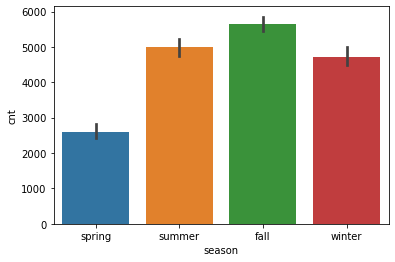

In [22]:
#Categorical Variables
sns.barplot(x='season',y='cnt',data=ds)
plt.show()

**Observations**:
Highest number bike rentals happened in Fall and least in spring.

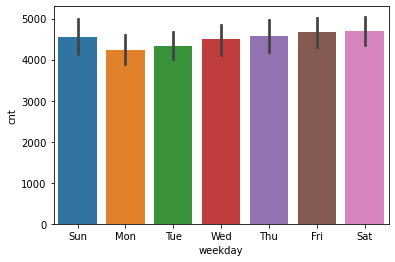

In [28]:
sns.barplot(x='weekday',y='cnt',data=ds)
plt.show()

In [ ]:
All weeek days have almost the same number of rentals

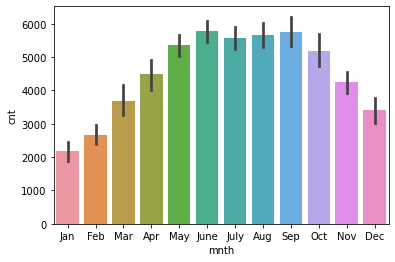

In [25]:
sns.barplot(x='mnth',y='cnt',data=ds)
plt.show()

**Observations**:
June and September months have observed the maximum number of rentals.

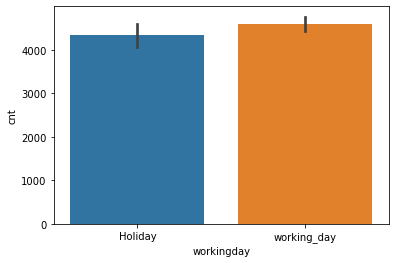

In [31]:
#Lets map 0 and 1 to holiday and working days
ds['workingday']=ds['workingday'].map({1:'working_day',0:'Holiday'})
sns.barplot(x='workingday',y='cnt',data=ds)
plt.show()

**Observations**:
Bike Rentals are more weekdays.

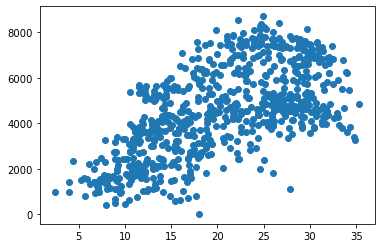

In [34]:
plt.scatter('temp','cnt',data=ds)
plt.show()

**Observations**:
Not linear but with increase in temperature we can see increase in number of rentals

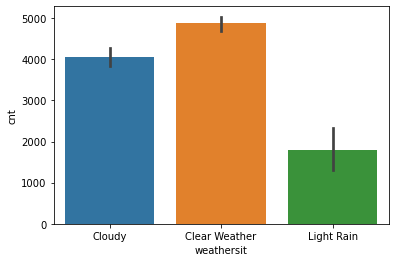

In [38]:
sns.barplot(x='weathersit',y='cnt',data=ds)
plt.show()

**Observations**
No bike rentals during heavy snow fall or rain. --Most of the rentals are during cloudy or clear weather.

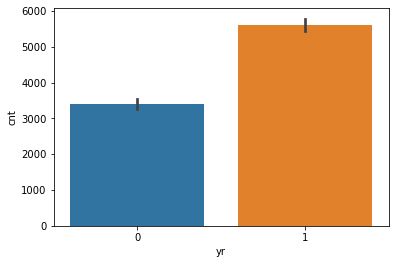

In [42]:
#Check year plot and it's depedencies on the bike rentals
sns.barplot(x='yr',y='cnt',data=ds)
plt.show()

# Observations

We can see that rentals are increasing wth passing years.So popularity is increasing

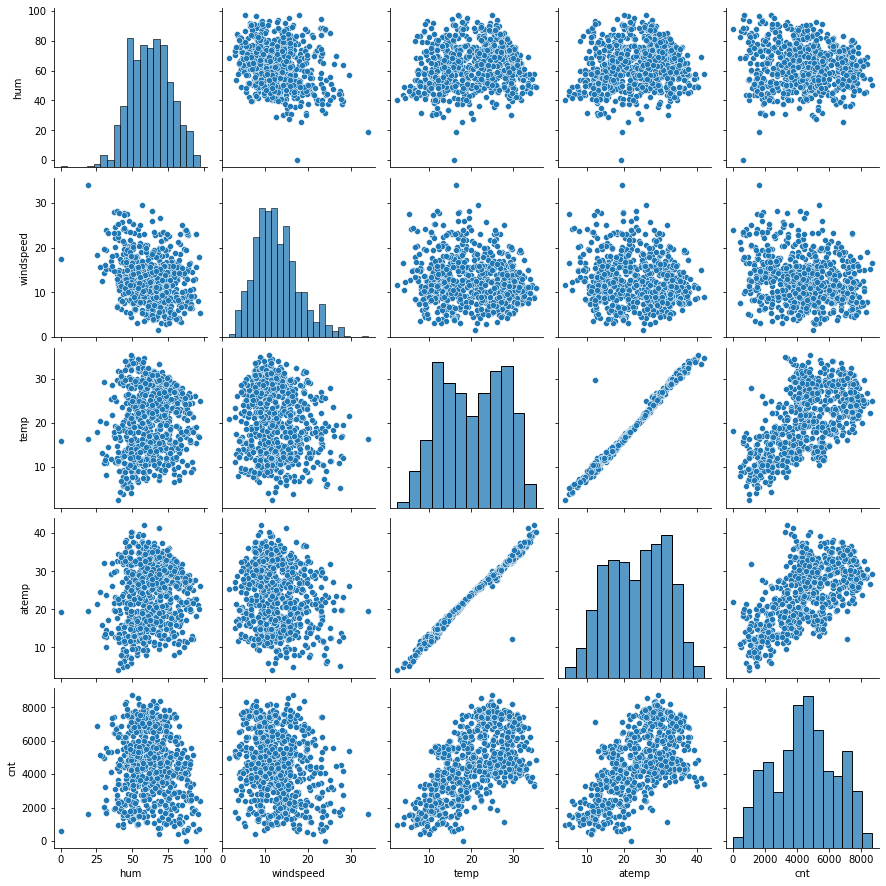

In [46]:
sns.pairplot(ds[['hum', 'windspeed','temp', 'atemp','cnt']])
plt.show()

# Observations

With Count(Bike Rentals)-

temp- Increase in temperature bike rentals also increase.

atemp- rentals increase with the feeling in temperature increase.

humidity- rentals are there when humidity is between 50 and 100.

WindSpeed- Its again highly scattered but less wind speed more rentals.

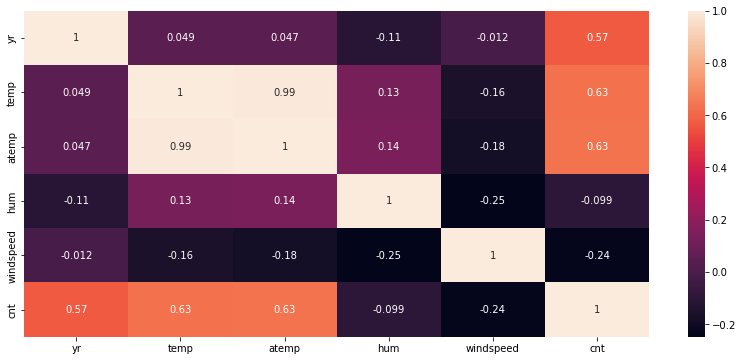

In [48]:
# Pairwise scatter plot
plt.figure(figsize=(14,6))
sns.heatmap(ds.corr(),annot=True)
plt.show()

**Observations**:

We can see that temp and atemp is highly correlated. Dropping atemp column from the above graph

In [8]:
#Dropping the atemp column
ds.drop('atemp',axis=1,inplace=True)

In [9]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   weekday     730 non-null    object 
 4   workingday  730 non-null    int64  
 5   weathersit  730 non-null    object 
 6   temp        730 non-null    float64
 7   hum         730 non-null    float64
 8   windspeed   730 non-null    float64
 9   cnt         730 non-null    int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 57.2+ KB


**In order to use the categorical values in model predicton lets convert the categorical columns using get_dummies from pandas to multiple columns containing 0 and 1 combinations**

In [10]:
Cols_To_Convert=['season','mnth','weekday','weathersit','workingday']
ds=pd.get_dummies(ds,drop_first=True)

In [11]:
ds.shape

(730, 28)

**Undestand the various varaibles in dataset and their depedencies**

**Now we have completed the data cleaning and initial analysis. Lets split the data into test and training sets. Since we have 730 rows lets split in the ratio of 70:30(train to test). Import the required libraries for splitting**

In [38]:
#split the data
from sklearn.model_selection import train_test_split

In [42]:
ds_train,ds_test=train_test_split(ds,train_size=0.7,random_state=100)

In [43]:
print(ds_train.shape)
print(ds_test.shape)

(510, 28)
(220, 28)


**Lets scale the columns temp,humidity,windspeed using MinMaxScaler. Scaling helps in making the comparisona across uniform and also make predictions better. This also helps in better understatnding of the coefficients obtained from the model.**



In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
Cols_To_Scale=['temp','hum','windspeed']
ds_train[Cols_To_Scale]=scaler.fit_transform(ds_train[Cols_To_Scale])
print(ds_train.head())

     yr  workingday      temp       hum  windspeed   cnt  season_spring  \
576   1           1  0.815169  0.725633   0.264686  7216              0   
426   1           0  0.442393  0.640189   0.255342  4066              1   
728   1           0  0.245101  0.498067   0.663106  1796              1   
482   1           0  0.395666  0.504508   0.188475  4220              0   
111   0           1  0.345824  0.751824   0.380981  1683              0   

     season_summer  season_winter  mnth_Aug  ...  mnth_Oct  mnth_Sep  \
576              0              0         0  ...         0         0   
426              0              0         0  ...         0         0   
728              0              0         0  ...         0         0   
482              1              0         0  ...         0         0   
111              1              0         0  ...         0         0   

     weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  \
576            0            0            0  

In [47]:
# Get x_train columns and y_train columns
x_train,y_train=ds_train,ds_train.pop('cnt')

In [48]:
print(y_train.head())

576    7216
426    4066
728    1796
482    4220
111    1683
Name: cnt, dtype: int64


**Model Building**

Since we have around 28 columns that can be used for predicting lets use RFE to elimate the unnecessary columns. We will reduce the number of columns to 13 using RFE then we will manually remove the columns depending on VIF and p values

In [50]:
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [51]:
lr=LinearRegression()

rfe=RFE(lr,n_features_to_select=13)
rfe_model=rfe.fit(x_train,y_train)

In [52]:
print(rfe_model.support_)           
print(rfe_model.ranking_)

[ True  True  True  True  True  True False  True False False False False
  True False False False False False  True  True False  True False False
 False  True  True]
[ 1  1  1  1  1  1  2  1  8  5  6  3  1 13 15  7  4 12  1  1 11  1 14  9
 10  1  1]


**Lets remove all the columns which are false in rfemodel.support**

In [53]:
Cols_From_RFE=x_train.columns[rfe_model.support_]
print(Cols_From_RFE)

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_July', 'mnth_Sep', 'weekday_Mon', 'weekday_Sun',
       'weathersit_Cloudy', 'weathersit_Light Rain'],
      dtype='object')


In [54]:
x_train_rfe=x_train[Cols_From_RFE]

We need to identify the correlation of one column wrt all other columns. And we will do this by using VIF. If VIF>5 we need to remove that column and we will remove using this.

We need to remove one column at a time as removing one will reduce the VIF in all other also

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [56]:
vif=pd.DataFrame()
vif['features']=x_train_rfe.columns
vif['vif']=[variance_inflation_factor(x_train_rfe.values,i) for i in range(x_train_rfe.shape[1])]
vif['vif']=round(vif['vif'],2)
vif=vif.sort_values(by='vif',ascending=False)
vif

,features,vif
3,hum,29.19
2,temp,17.25
1,workingday,16.91
10,weekday_Sun,4.57
4,windspeed,4.52
9,weekday_Mon,4.45
5,season_spring,2.79
11,weathersit_Cloudy,2.28
6,season_winter,2.14
0,yr,2.08


In [57]:
x_train_rfe_sm=sm.add_constant(x_train_rfe)
lr=sm.OLS(y_train,x_train_rfe_sm)
lr_model=lr.fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.7
Date:                Sun, 11 Sep 2022   Prob (F-statistic):          9.38e-190
Time:                        22:52:33   Log-Likelihood:                -4114.9
No. Observations:                 510   AIC:                             8258.
Df Residuals:                     496   BIC:                             8317.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2069.31

**lets remove a column which has high VIF value - hum.**

In [60]:
x_train_rfe.drop('hum',axis=1,inplace=True)
x_train_rfe_sm=sm.add_constant(x_train_rfe)
lr=sm.OLS(y_train,x_train_rfe_sm)
lr_model=lr.fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.3
Date:                Sun, 11 Sep 2022   Prob (F-statistic):          1.26e-187
Time:                        22:53:24   Log-Likelihood:                -4122.7
No. Observations:                 510   AIC:                             8271.
Df Residuals:                     497   BIC:                             8326.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1372.07

In [61]:
vif=pd.DataFrame()
vif['features']=x_train_rfe.columns
vif['vif']=[variance_inflation_factor(x_train_rfe.values,i) for i in range(x_train_rfe.shape[1])]
vif['vif']=round(vif['vif'],2)
vif=vif.sort_values(by='vif',ascending=False)
print(vif)

                 features    vif
1              workingday  13.12
2                    temp  12.38
3               windspeed   4.48
9             weekday_Sun   3.77
8             weekday_Mon   3.54
4           season_spring   2.44
0                      yr   2.07
5           season_winter   1.78
10      weathersit_Cloudy   1.58
6               mnth_July   1.37
7                mnth_Sep   1.20
11  weathersit_Light Rain   1.09


**Since workingday_working_day has vif 13.12 lets remove it.**

In [64]:
x_train_rfe.drop('workingday',axis=1,inplace=True)
x_train_rfe_sm=sm.add_constant(x_train_rfe)
lr=sm.OLS(y_train,x_train_rfe_sm)
lr_model=lr.fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     225.6
Date:                Sun, 11 Sep 2022   Prob (F-statistic):          1.84e-185
Time:                        22:57:34   Log-Likelihood:                -4130.7
No. Observations:                 510   AIC:                             8285.
Df Residuals:                     498   BIC:                             8336.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2245.28

In [65]:
vif=pd.DataFrame()
vif['features']=x_train_rfe.columns
vif['vif']=[variance_inflation_factor(x_train_rfe.values,i) for i in range(x_train_rfe.shape[1])]
vif['vif']=round(vif['vif'],2)
vif=vif.sort_values(by='vif',ascending=False)
print(vif)

                 features   vif
1                    temp  4.72
2               windspeed  4.04
0                      yr  2.06
3           season_spring  1.66
9       weathersit_Cloudy  1.52
4           season_winter  1.41
5               mnth_July  1.35
8             weekday_Sun  1.22
7             weekday_Mon  1.21
6                mnth_Sep  1.20
10  weathersit_Light Rain  1.08


**Since weekday_Sun has p value 0.184 which means it is in significant so, lets remove it.**

In [67]:
x_train_rfe.drop('weekday_Sun',axis=1,inplace=True)
x_train_rfe_sm=sm.add_constant(x_train_rfe)
lr=sm.OLS(y_train,x_train_rfe_sm)
lr_model=lr.fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.6
Date:                Sun, 11 Sep 2022   Prob (F-statistic):          2.75e-186
Time:                        22:58:28   Log-Likelihood:                -4131.6
No. Observations:                 510   AIC:                             8285.
Df Residuals:                     499   BIC:                             8332.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2269.67

In [68]:
vif=pd.DataFrame()
vif['features']=x_train_rfe.columns
vif['vif']=[variance_inflation_factor(x_train_rfe.values,i) for i in range(x_train_rfe.shape[1])]
vif['vif']=round(vif['vif'],2)
vif=vif.sort_values(by='vif',ascending=False)
print(vif)

                features   vif
1                   temp  4.67
2              windspeed  4.00
0                     yr  2.06
3          season_spring  1.64
8      weathersit_Cloudy  1.52
4          season_winter  1.40
5              mnth_July  1.35
6               mnth_Sep  1.20
7            weekday_Mon  1.17
9  weathersit_Light Rain  1.08


**Observations**

As all p values are nearly 0(means all are highy significant) and VIF of all columns are less than 5, we can conclude this as our final model.

**Lets predict the y values and plot the residuals**

In [69]:
y_train_pred=lr_model.predict(x_train_rfe_sm)
residual=y_train-y_train_pred

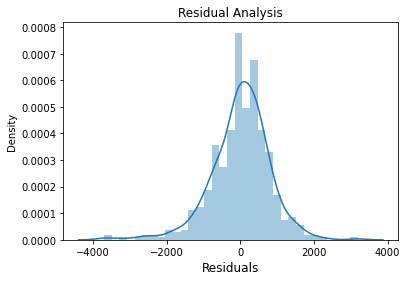

In [71]:
fig=sns.distplot(residual)
fig.set_title('Residual Analysis',fontsize=12)
plt.xlabel('Residuals',fontsize=12)
plt.show()

Since mean is 0 for residuals we can see that they are normally distributed

In [74]:
x_test,y_test=ds_test,ds_test.pop('cnt')

In [76]:
#scale the test data
Cols_To_Scale=['temp','hum','windspeed']
x_test[Cols_To_Scale]=scaler.transform(x_test[Cols_To_Scale])
x_test.head()

,yr,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
184,0,0,0.831783,0.657364,0.084219,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
535,1,1,0.901354,0.610133,0.153728,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
299,0,1,0.511964,0.837699,0.334206,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
221,0,1,0.881625,0.437098,0.339570,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
152,0,1,0.817246,0.314298,0.537414,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
#predicting against x_test values
x_test=x_test[x_train_rfe.columns]
x_test=sm.add_constant(x_test)
y_test_pred=lr_model.predict(x_test)

**Calculating the r2_score**

In [78]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_test_pred))

0.8091992919519853


**Final Conclusions**

---r2_score on test data is 80.9 and R square values on the model is 83.2. Since the difference is very less we can say this is a good model.

-- With the R2 values we can conclude there is no overfit or underfit of the model

-- temperature,year,winter,september are positively correlated means with increase in this(or during these periods) the bike rentals also increase

-- windspeed,spring,Monday,july,light rain and cloudy are negatively correlated means with increase in this(or during these periods) the bike rentals decrease.